In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import subprocess

# modeling report

## Getting data
Here there is a code that:
1. Make json configuration file (config_file.json) in algorithmic way
2. Send it to modeling programm (model.exe)
3. Read modeled data  

After running this code one can get any data needed.  

Example for config_file.json
<pre>
config = {  
    'entries' : [  
        {  
            'model' : 'Euler',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        },  
        {  
            'model' : 'Heun',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        },  
        {  
            'model' : 'RK45',  
            'omega' : 2,  
            'initial coordinate' : 6400000,  
            'initial velocity' : 0,  
            'modeling interspace' : 10,  
            'step of modeling' : 0.01  
        }  
    ]  
}
</pre>

In [3]:
config = {'entries' : [], 'file names': []}
pair_e = []
pair_h = []
pair_rk = []
for i in np.linspace(0.1, 0.05, 2):
    pair_e.append([i, (i)**-1])
    pair_h.append([i, (i)**-2])
    pair_rk.append([i ,(i)**-2])
for i in range(len(pair_e)):
    config['entries'].append({
        'model' : 'Euler',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_e[i][1],
        'step of modeling' : pair_e[i][0]
    })
    config['file names'].append({'name':
        'data/Euler_'+
        str(int(config['entries'][i]['omega']))+'_'+
        str(int(config['entries'][i]['initial coordinate']))+'_'+
        str(int(config['entries'][i]['initial velocity']))+'_'+
        str(int(config['entries'][i]['modeling interspace']))+'_'+
        str(round(config['entries'][i]['step of modeling'],6))+'.txt'
    })
for i in range(len(pair_e)):
    config['entries'].append({
        'model' : 'Heun',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_h[i][1],
        'step of modeling' : pair_h[i][0]
    })
    config['file names'].append({'name':
        'data/Heun_'+
        str(int(config['entries'][i]['omega']))+'_'+
        str(int(config['entries'][i]['initial coordinate']))+'_'+
        str(int(config['entries'][i]['initial velocity']))+'_'+
        str(int(config['entries'][i]['modeling interspace']))+'_'+
        str(round(config['entries'][i]['step of modeling'],6))+'.txt'
    })
for i in range(len(pair_e)):
    config['entries'].append({
        'model' : 'RK45',
        'omega' : 2,
        'initial coordinate' : 6400000,
        'initial velocity' : 0,
        'modeling interspace' : pair_rk[i][1],
        'step of modeling' : pair_rk[i][0]
    })
    config['file names'].append({'name':
        'data/RK45_'+
        str(int(config['entries'][i]['omega']))+'_'+
        str(int(config['entries'][i]['initial coordinate']))+'_'+
        str(int(config['entries'][i]['initial velocity']))+'_'+
        str(int(config['entries'][i]['modeling interspace']))+'_'+
        str(round(config['entries'][i]['step of modeling'],6))+'.txt'
    })
write = open('config_file.json', 'w')
json.dump(config, write, indent=4)
write.close()

In [13]:
cmd = 'c:/users/coolg/modeling/wk4/model.exe'
returned_output = subprocess.check_output(cmd)
print(returned_output.decode('utf-8'))

CalledProcessError: Command 'c:/users/coolg/modeling/wk4/model.exe' returned non-zero exit status 3.

In [6]:
str(round(0.05, 6)) + '0'*(8-len(str(0.05)))

'0.050000'

In [6]:
d_e = []
d_h = []
d_rk = []
count = 0
for i in range(len(config['entries'])):
    if (config['entries'][i]['model'] == 'Euler'):
        d_e.append(pd.read_csv(config['file names'][i]['name']))
    if (config['entries'][i]['model'] == 'Heun'):
        d_h.append(pd.read_csv(config['file names'][i]['name']))
    if (config['entries'][i]['model'] == 'RK45'):
        d_rk.append(pd.read_csv(config['file names'][i]['name']))
    print(config['file names'][i]['name'], 'has been added to dataset')
    count += 1
print(count, 'files were added')
print('Euler: ',len(d_e))
print('Houn:  ',len(d_h))
print('RK45:  ',len(d_rk))

data/Euler_2_6400000_0_10_0.1.txt has been added to dataset
data/Euler_2_6400000_0_20_0.05.txt has been added to dataset
data/Heun_2_6400000_0_10_0.1.txt has been added to dataset
data/Heun_2_6400000_0_20_0.05.txt has been added to dataset
data/RK45_2_6400000_0_10_0.1.txt has been added to dataset
data/RK45_2_6400000_0_20_0.05.txt has been added to dataset
6 files were added
Euler:  2
Houn:   2
RK45:   2


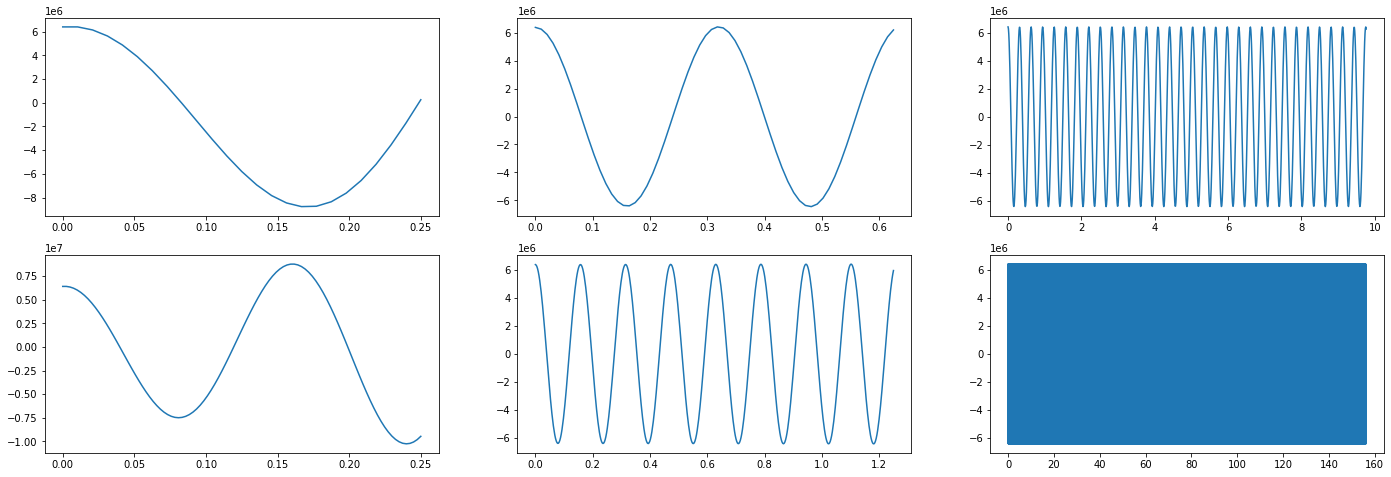

In [33]:
fig, ax = plt.subplots(max(len(d_e), len(d_h), len(d_rk)), 3)
fig.set_size_inches(24,8)

for i in range(len(d_e)):
    t = np.linspace(0, d_e[i].h[0] * d_e[i].L[0], len(d_e[i].x))
    ax[i][0].plot(t, d_e[i].x)
for i in range(len(d_h)):
    t = np.linspace(0, d_h[i].h[0] * d_h[i].L[0], len(d_h[i].x))
    ax[i][1].plot(t, d_h[i].x)
for i in range(len(d_rk)):
    t = np.linspace(0, d_rk[i].h[0] * d_rk[i].L[0], len(d_rk[i].x))
    ax[i][2].plot(t, d_rk[i].x)

plt.show()

In [34]:
en_e = []
en_h = []
en_rk = []

for i in range(len(d_e)):
    en_e.append((d_e[i].v ** 2 + d_e[i].w[0] ** 2 * d_e[i].x ** 2) / (d_e[i].v[0] ** 2 + d_e[i].w[0] ** 2 * d_e[i].x[0] ** 2))
for i in range(len(d_h)):
    en_h.append((d_h[i].v ** 2 + d_h[i].w[0] ** 2 * d_h[i].x ** 2) / (d_h[i].v[0] ** 2 + d_h[i].w[0] ** 2 * d_h[i].x[0] ** 2))
for i in range(len(d_rk)):
    en_rk.append((d_rk[i].v ** 2 + d_rk[i].w[0] ** 2 * d_rk[i].x ** 2) / (d_rk[i].v[0] ** 2 + d_rk[i].w[0] ** 2 * d_rk[i].x[0] ** 2))

In [53]:
func_e=[]
func_h=[]
func_rk=[]
coeff_e = []
step_e = []
coeff_h = []
step_h = []
coeff_rk = []
step_rk = []

for i in range(len(d_e)):
    t = np.linspace(0, d_e[i].h[0] * d_e[i].L[0], len(d_e[i].x))
    func_e.append(np.polyfit(t, np.log(en_e[i]), deg=1))
for i in range(len(d_h)):
    t = np.linspace(0, d_h[i].h[0] * d_h[i].L[0], len(d_h[i].x))
    func_h.append(np.polyfit(t, np.log(en_h[i]), deg=1))
for i in range(len(d_rk)):
    t = np.linspace(0, d_rk[i].h[0] * d_rk[i].L[0], len(d_rk[i].x))
    func_rk.append(np.polyfit(t, np.log(en_rk[i]), deg=1))

for i in range(len(d_e)):
    coeff_e.append(func_e[i][0])
    step_e.append(d_e[i].h[0])
for i in range(len(d_h)):
    coeff_h.append(func_h[i][0])
    step_h.append(d_h[i].h[0])
for i in range(len(d_rk)):
    coeff_rk.append(func_rk[i][0])
    step_rk.append(d_rk[i].h[0])

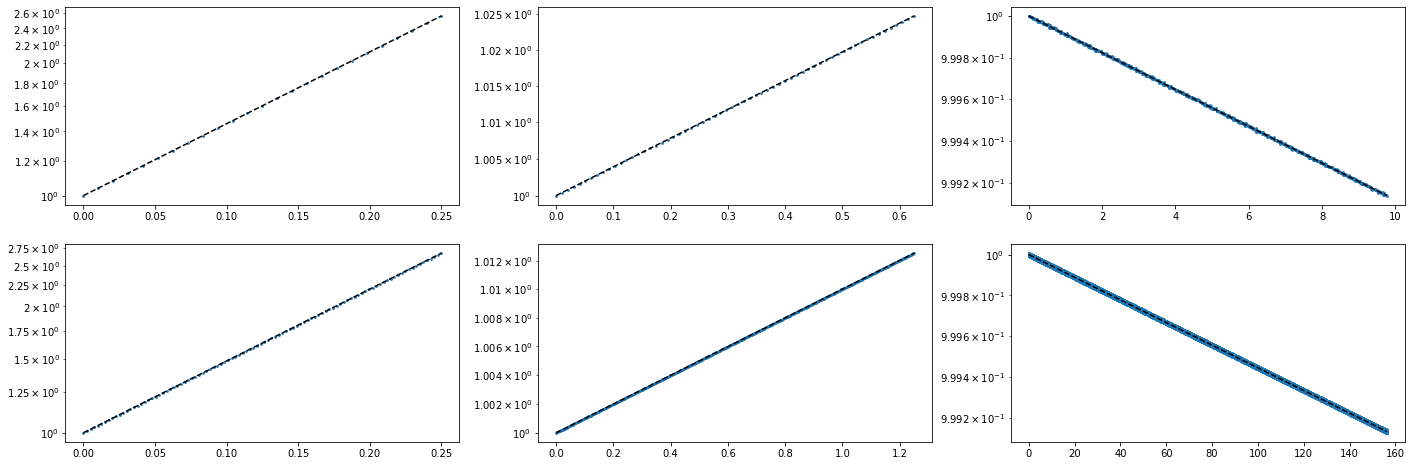

In [50]:
fig, ax = plt.subplots(max(len(d_e), len(d_h), len(d_rk)), 3)
fig.set_size_inches(24,8)

for i in range(len(d_e)):
    t = np.linspace(0, d_e[i].h[0] * d_e[i].L[0], len(d_e[i].x))
    ax[i][0].scatter(t, en_e[i], s=3)
    ax[i][0].plot(t, np.exp(func_e[i][0] * t), '--', c='black')
    ax[i][0].set_yscale('log')
for i in range(len(d_h)):
    t = np.linspace(0, d_h[i].h[0] * d_h[i].L[0], len(d_h[i].x))
    ax[i][1].scatter(t, en_h[i], s=3)
    ax[i][1].plot(t, np.exp(func_h[i][0] * t), '--', c='black')
    ax[i][1].set_yscale('log')
for i in range(len(d_rk)):
    t = np.linspace(0, d_rk[i].h[0] * d_rk[i].L[0], len(d_rk[i].x))
    ax[i][2].scatter(t, en_rk[i], s=3)
    ax[i][2].plot(t, np.exp(func_rk[i][0] * t), '--', c='black')
    ax[i][2].set_yscale('log')

plt.show()

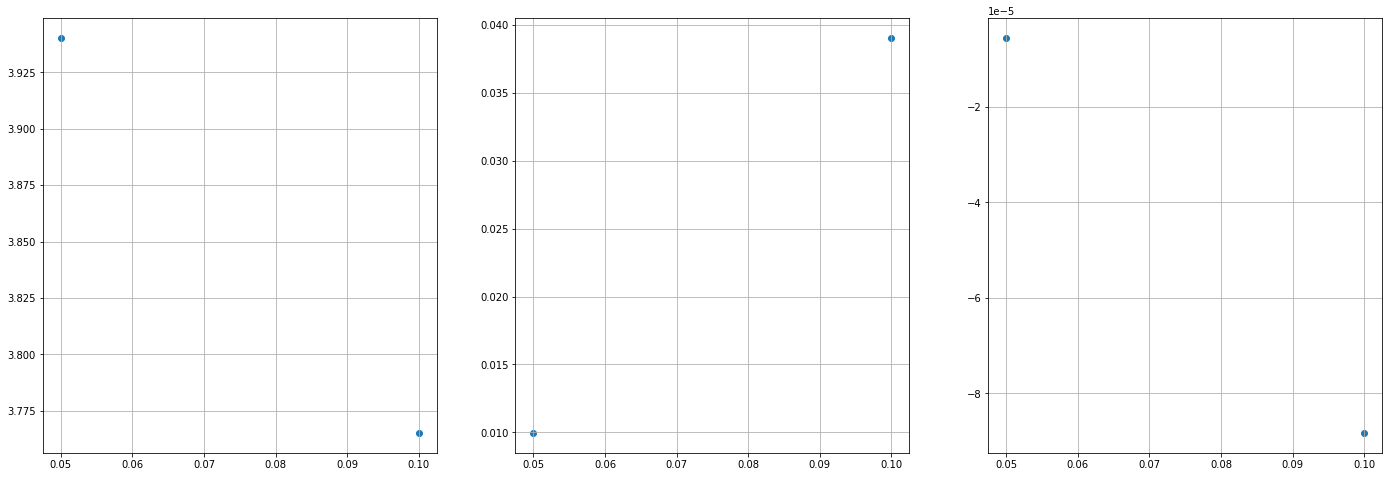

In [56]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(24,8)

ax[0].scatter(step_e, coeff_e)
ax[1].scatter(step_h, coeff_h)
ax[2].scatter(step_rk, coeff_rk)

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
plt.show()